In [1]:
import pandas as pd
import quandl

In [85]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2018-01-01')

In [86]:
quandl.ApiConfig.api_key = "Y_mzxQCA8ye8j59Xty6F"

In [87]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end,)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [88]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [89]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [90]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [91]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2017-12-22,175.01,3.311524
2017-12-26,170.57,3.227510
2017-12-27,170.60,3.228078
2017-12-28,171.08,3.237160
2017-12-29,169.23,3.202155


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [92]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [93]:
aapl.tail()

,Adj. Close,Normed Return,Allocation
Date,,,
2017-12-22,175.01,3.311524,0.993457
2017-12-26,170.57,3.227510,0.968253
2017-12-27,170.60,3.228078,0.968423
2017-12-28,171.08,3.237160,0.971148
2017-12-29,169.23,3.202155,0.960646


In [94]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [95]:
portfolio_val = pd.concat([aapl['Position Values'],
                           cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [96]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [97]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [98]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [99]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Total Portfolio Value')

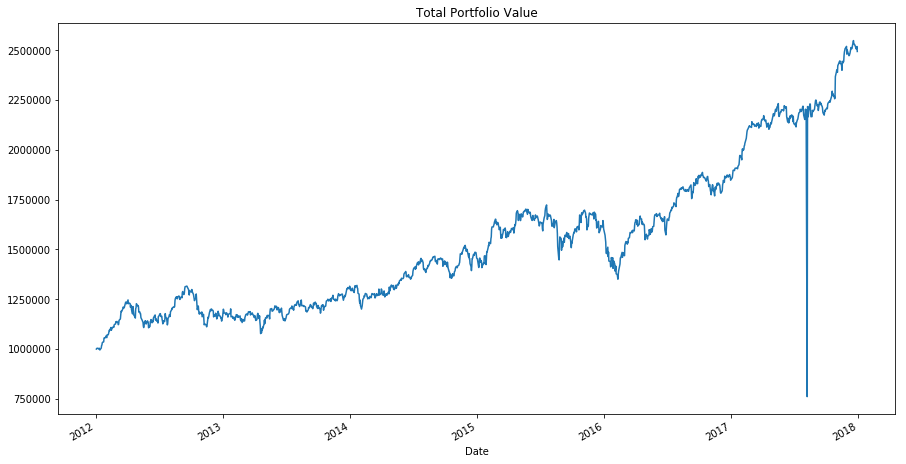

In [101]:
portfolio_val['Total Pos'].plot(figsize=(15,8))
plt.title('Total Portfolio Value')

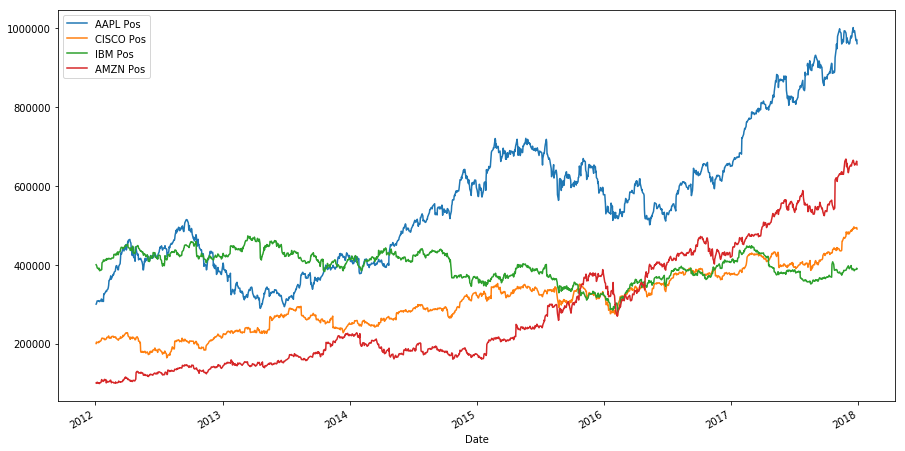

In [104]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line', figsize=(15,8))

In [105]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2017-12-22,993457.057344,493682.000160,387108.963271,652605.708540,2.526854e+06
2017-12-26,968253.072802,492785.560730,387946.641683,657297.659610,2.506283e+06
2017-12-27,968423.369995,493810.062936,388708.167512,660369.770430,2.511311e+06
2017-12-28,971148.125081,494194.251263,391018.129195,662514.662347,2.518875e+06
2017-12-29,960646.464855,490480.430768,389444.309147,653225.716360,2.493797e+06


# Portfolio Stats

In [106]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [107]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 149.37969211313438 was percent!


In [108]:
portfolio_val['Daily Return'].mean()

0.001488268108578974

In [109]:
portfolio_val['Daily Return'].std()

0.053060864928426314

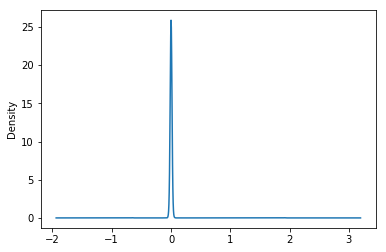

In [110]:
portfolio_val['Daily Return'].plot(kind='kde')

In [111]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [112]:
SR

0.028048319803804473

In [113]:
ASR = (252**0.5)*SR

In [114]:
ASR

0.44525327336444764

In [115]:
portfolio_val['Daily Return'].std()

0.053060864928426314

In [116]:
portfolio_val['Daily Return'].mean()

0.001488268108578974

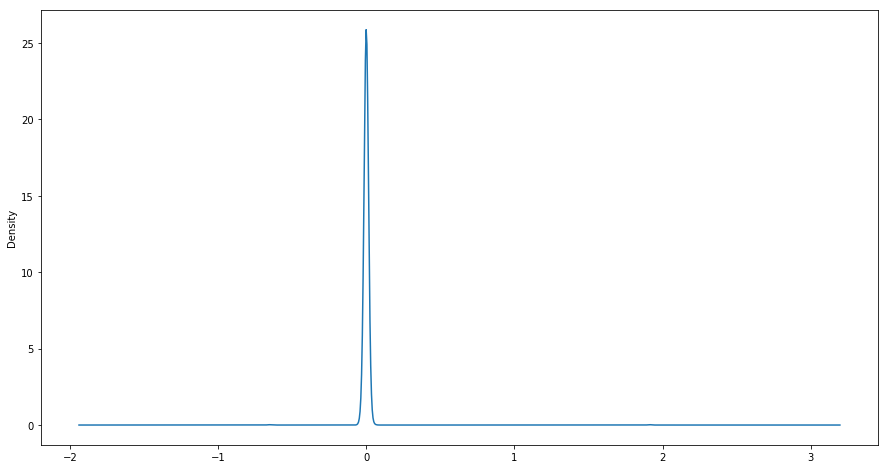

In [117]:
portfolio_val['Daily Return'].plot('kde',figsize=(15,8))

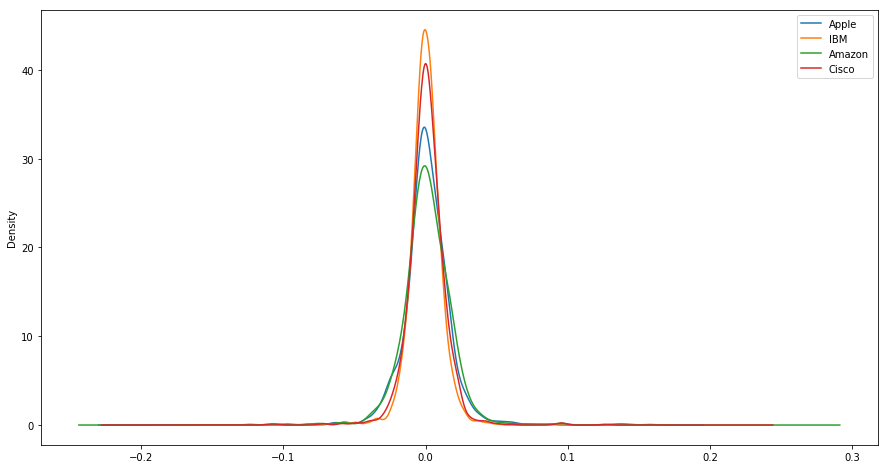

In [118]:
plt.figure(figsize=(15,8))

aapl['Adj. Close'].pct_change(1).plot('kde',label='Apple')
ibm['Adj. Close'].pct_change(1).plot('kde',label='IBM')
amzn['Adj. Close'].pct_change(1).plot('kde',label='Amazon')
cisco['Adj. Close'].pct_change(1).plot('kde', label ='Cisco')

plt.legend()

In [119]:
#Sharpe 
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

In [120]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
tesla = quandl.get('WIKI/TSLA.11',start_date=start,end_date=end)
fb = quandl.get('WIKI/FB.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

stocks = pd.concat([aapl,tesla,fb,amzn],axis=1)
stocks.columns = ['aapl','tesla','fb','amzn']

In [121]:
stocks.head()

,aapl,tesla,fb,amzn
Date,,,,
2012-01-03,52.848787,28.08,NaN,179.03
2012-01-04,53.132802,27.71,NaN,177.51
2012-01-05,53.722681,27.12,NaN,177.61
2012-01-06,54.284287,26.91,NaN,182.61
2012-01-09,54.198183,27.25,NaN,178.56


In [122]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000896
tesla    0.002059
fb       0.001350
amzn     0.001418
dtype: float64

In [123]:
stocks.pct_change(1).corr()

,aapl,tesla,fb,amzn
aapl,1.000000,0.199292,0.224724,0.258350
tesla,0.199292,1.000000,0.203566,0.258925
fb,0.224724,0.203566,1.000000,0.338040
amzn,0.258350,0.258925,0.338040,1.000000


In [124]:
stocks.head()

,aapl,tesla,fb,amzn
Date,,,,
2012-01-03,52.848787,28.08,NaN,179.03
2012-01-04,53.132802,27.71,NaN,177.51
2012-01-05,53.722681,27.12,NaN,177.61
2012-01-06,54.284287,26.91,NaN,182.61
2012-01-09,54.198183,27.25,NaN,178.56


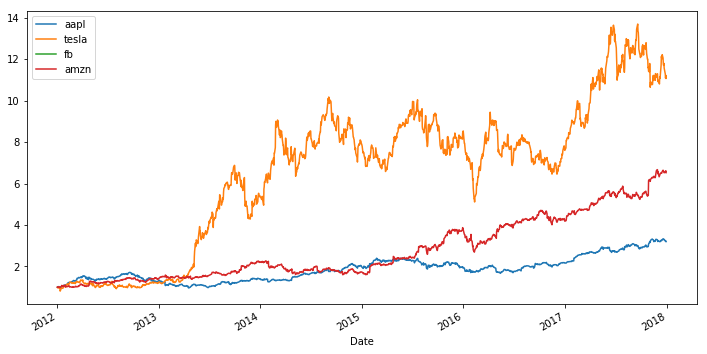

In [125]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(12,6))

In [126]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,tesla,fb,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.013177,NaN,-0.008490
2012-01-05,0.011102,-0.021292,NaN,0.000563
2012-01-06,0.010454,-0.007743,NaN,0.028152
2012-01-09,-0.001586,0.012635,NaN,-0.022178


In [127]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,tesla,fb,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.013264,NaN,-0.008526
2012-01-05,0.011041,-0.021522,NaN,0.000563
2012-01-06,0.010400,-0.007773,NaN,0.027763
2012-01-09,-0.001587,0.012556,NaN,-0.022428


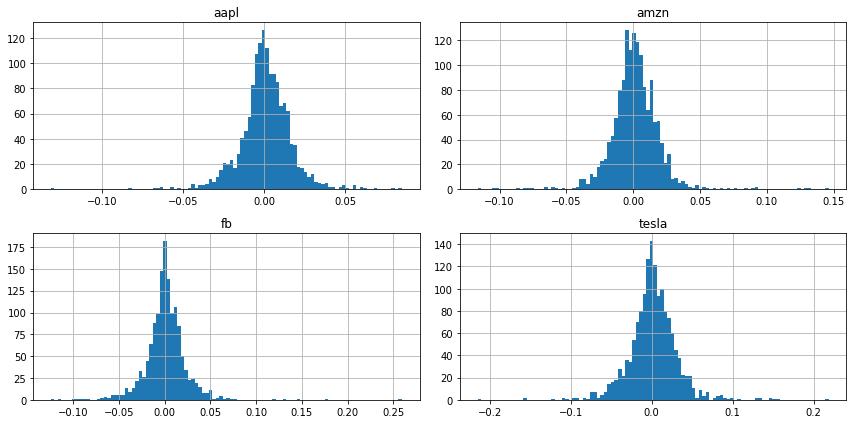

In [128]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [129]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1505.0,0.000758,0.015706,-0.131875,-0.006679,0.000490,0.009118,0.085022
tesla,1507.0,0.001596,0.030312,-0.214772,-0.013156,0.001075,0.017117,0.218355
fb,1412.0,0.001083,0.022970,-0.124394,-0.009075,0.000936,0.011792,0.259342
amzn,1505.0,0.001245,0.018460,-0.116503,-0.007650,0.000851,0.010729,0.146225


In [130]:
log_ret.mean() * 252

aapl     0.190968
tesla    0.402307
fb       0.272957
amzn     0.313864
dtype: float64

In [131]:
log_ret.cov()

,aapl,tesla,fb,amzn
aapl,0.000247,0.000095,0.000081,0.000075
tesla,0.000095,0.000919,0.000145,0.000149
fb,0.000081,0.000145,0.000528,0.000143
amzn,0.000075,0.000149,0.000143,0.000341


In [132]:
log_ret.cov()*252

,aapl,tesla,fb,amzn
aapl,0.062167,0.023964,0.020518,0.018948
tesla,0.023964,0.231536,0.036420,0.037477
fb,0.020518,0.036420,0.132958,0.035973
amzn,0.018948,0.037477,0.035973,0.085875


In [133]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['aapl', 'tesla', 'fb', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.3028649147175915


Expected Volatility
0.2709030664476893


Sharpe Ratio
1.117982600525764


In [134]:
log_ret.cov() * 252

,aapl,tesla,fb,amzn
aapl,0.062167,0.023964,0.020518,0.018948
tesla,0.023964,0.231536,0.036420,0.037477
fb,0.020518,0.036420,0.132958,0.035973
amzn,0.018948,0.037477,0.035973,0.085875


In [135]:
np.dot(log_ret.cov() * 252, weights)

array([0.03854708, 0.11807536, 0.03211588, 0.03645958])

In [136]:
weights.T

array([0.40122278, 0.44338777, 0.02212343, 0.13326603])

In [137]:
np.dot(weights.T, np.dot(log_ret.cov() * 252, weights))

0.07338847141076116

In [138]:
np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

0.2709030664476893

In [139]:
num_ports = 25000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [140]:
sharpe_arr.max()

1.3187431873598439

In [141]:
n = sharpe_arr.argmax()
all_weights[n,:]

array([0.26768473, 0.17243012, 0.15201059, 0.40787456])

In [142]:
max_sr_ret = ret_arr[n]
max_sr_vol = vol_arr[n]

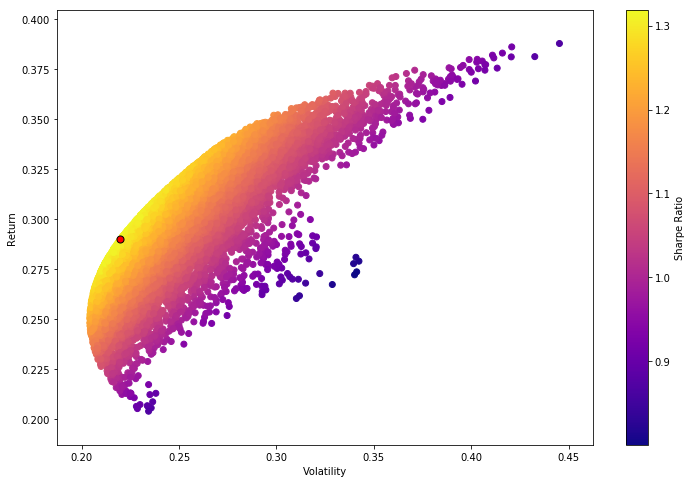

In [143]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [144]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [145]:
from scipy.optimize import minimize

In [146]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [147]:
# Constraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [148]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [149]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [150]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [151]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [152]:
opt_results

     fun: -1.3189647686658053
     jac: array([ 0.000476  , -0.00125369, -0.00053483,  0.00038667])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.27293752, 0.1717184 , 0.14036943, 0.41497465])

In [153]:
opt_results.x

array([0.27293752, 0.1717184 , 0.14036943, 0.41497465])

In [154]:
get_ret_vol_sr(opt_results.x)

array([0.28976638, 0.21969228, 1.31896477])